In [118]:
# carregar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn import preprocessing
import statsmodels.api as sm
#from elm import ELMRegressor
from simpleELM import ELMRegressor


In [119]:
path = 'C:/Users/Micro/Desktop/PAIRS_TRADING/DATA/PREBASE/'
dfbovespa = pd.read_csv(path+"COTACOES_consolidado.csv", sep = ';',encoding="ISO-8859-1")

In [120]:
#Seleção do par de ativos para análise de correlação e cointegração
acao1 = 'MYPK3'
acao2 = 'CIEL3'
df_acao1 = dfbovespa[dfbovespa["cod_papel"] == acao1]
df_acao2 = dfbovespa[dfbovespa["cod_papel"] == acao2]


In [121]:
df_comp = pd.DataFrame()
df_comp['data_pregao'] =  pd.to_datetime(df_acao1['data_pregao'].values)
df_comp[acao1] =  df_acao1['preco_ultimo'].values
df_comp[acao2] =  df_acao2['preco_ultimo'].values
df_comp.set_index('data_pregao', inplace=True)
df_comp.head()

,MYPK3,CIEL3
data_pregao,,
2010-01-04,25.75,15.80
2010-01-05,26.21,15.69
2010-01-06,27.65,15.65
2010-01-07,28.37,16.02
2010-01-08,28.65,15.82


In [122]:
spread = df_comp[acao1] - df_comp[acao2]
df_comp['Spread'] =  spread
df_comp.head()

,MYPK3,CIEL3,Spread
data_pregao,,,
2010-01-04,25.75,15.80,9.95
2010-01-05,26.21,15.69,10.52
2010-01-06,27.65,15.65,12.00
2010-01-07,28.37,16.02,12.35
2010-01-08,28.65,15.82,12.83


In [123]:
from sklearn.model_selection import train_test_split


#y= df_comp.Spread
#x= df_comp.drop('Spread',axis=1)
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [124]:
train_df = df_comp['2018-04-30':'2019-06-30']
test_df = df_comp['2019-07-01':'2019-12-31']
x_train = train_df.drop('Spread',axis=1)
x_test = test_df.drop('Spread',axis=1)
y_train = train_df.Spread
y_test = test_df.Spread

In [125]:
elm = ELMRegressor(n_hidden_units=100)

elm.fit(x_train, y_train)
prediction = elm.predict(x_test)
prediction

array([15.23661041, 15.11950302, 14.9609642 , 15.46684265, 15.6280632 ,
       15.27774811, 15.0399704 , 14.77418518, 14.9162941 , 15.05579758,
       14.92951202, 14.87113953, 15.22933197, 15.2762413 , 15.16331863,
       15.46194839, 14.58501053, 14.45008469, 14.85424805, 14.91466904,
       14.60969162, 14.59226227, 13.09217072, 13.23753357, 13.03144073,
       12.79788208, 12.90840149, 13.19489288, 13.03323364, 12.17946625,
       12.09898758, 11.61851883, 11.30350113, 11.75893784, 11.76002502,
       11.43027878, 11.28661728, 11.67896652, 11.45516968, 11.59078598,
       11.37824631, 11.20249939, 11.40050888, 11.75038528, 11.93843842,
       11.81945038, 11.30584717, 11.80017471, 12.13935089, 12.41154861,
       12.23988724, 12.15923309, 12.65105438, 12.38026428, 11.79586029,
       11.73814774, 11.00502777, 10.94789886, 10.93790436, 10.59001923,
       10.42370224, 10.84621429, 10.49438858, 10.82319641, 11.18743896,
       10.86349106, 10.7495842 , 10.28780746, 10.8235054 ,  9.98

In [126]:
df_result = pd.DataFrame()
df_result['predicted'] = prediction
df_result['test'] = y_test.values
df_result.head(20)

,predicted,test
0,15.236610,15.24
1,15.119503,15.18
2,14.960964,14.96
3,15.466843,15.49
4,15.628063,15.64
5,15.277748,15.29
6,15.039970,15.05
7,14.774185,14.78
8,14.916294,14.92
9,15.055798,15.06


In [127]:
y_test

data_pregao
2019-07-01    15.24
2019-07-02    15.18
2019-07-03    14.96
2019-07-04    15.49
2019-07-05    15.64
              ...  
2019-12-20    14.04
2019-12-23    14.15
2019-12-26    14.25
2019-12-27    14.61
2019-12-30    15.01
Name: Spread, Length: 126, dtype: float64

<AxesSubplot:>

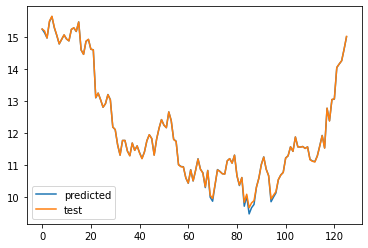

In [128]:
import matplotlib.pyplot as plt
df_result.plot()